<a href="https://colab.research.google.com/github/suryapratapkhuntia/Machine-Learning-End_to_end_project/blob/main/multiple_linear_regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [31]:
x,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=50)

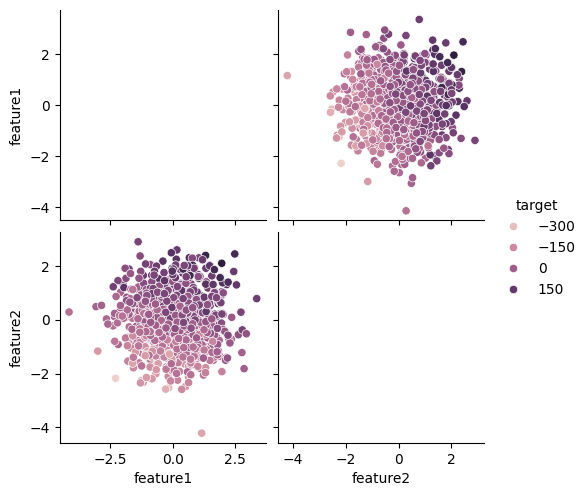

In [29]:
from re import X
df=pd.DataFrame({'feature1':x[:,0],'feature2':x[:,1],'target':y})
sns.pairplot(df,hue='target', vars=['feature1','feature2'])
plt.show()

In [32]:
df.head()

,feature1,feature2,target
0,-0.024855,1.914661,269.918241
1,-0.132576,0.374354,28.488048
2,-1.425862,0.785324,19.243584
3,0.290290,1.353118,105.631737
4,0.626979,1.138620,24.150514


In [33]:
df.shape

(1000, 3)

In [34]:
import plotly.express as px
import plotly.graph_objects as go

In [35]:
fig =px.scatter_3d(df,x='feature1',y='feature2',z='target')
fig.show()

In [38]:
x = df[['feature1', 'feature2']]
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (800, 2)
Shape of x_test: (200, 2)
Shape of y_train: (800,)
Shape of y_test: (200,)


In [39]:
lr=LinearRegression()

In [40]:
lr.fit(x_train,y_train)

LinearRegression()

In [42]:

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)

LinearRegression()

In [43]:
y_pred=lr.predict(x_test)


In [44]:
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_score:',r2_score(y_test,y_pred))

MAE: 34.947722684094295
MSE: 1997.17409270741
RMSE: 44.689753777654786
R2_score: 0.7082939244131048


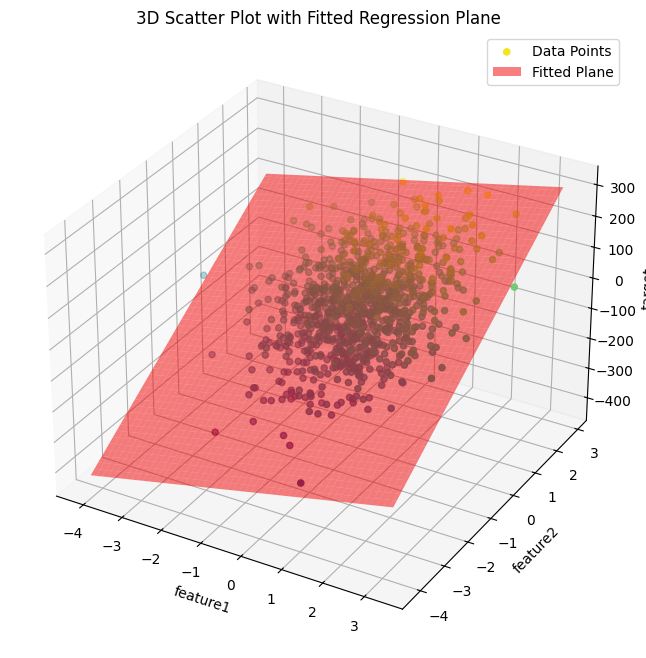

In [45]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


x1_surf, x2_surf = np.meshgrid(np.linspace(df['feature1'].min(), df['feature1'].max(), 100),
                               np.linspace(df['feature2'].min(), df['feature2'].max(), 100))


surf_df = pd.DataFrame({'feature1': x1_surf.ravel(), 'feature2': x2_surf.ravel()})


z_surf = lr.predict(surf_df)
z_surf = z_surf.reshape(x1_surf.shape)


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['feature1'], df['feature2'], df['target'], c=df['target'], cmap='viridis', marker='o', label='Data Points')
ax.plot_surface(x1_surf, x2_surf, z_surf, color='red', alpha=0.5, label='Fitted Plane')

ax.set_xlabel('feature1')
ax.set_ylabel('feature2')
ax.set_zlabel('target')
ax.set_title('3D Scatter Plot with Fitted Regression Plane')
ax.legend()

plt.show()

In [46]:
lr.coef_

array([27.74249381, 73.42407116])

In [47]:
lr.intercept_

np.float64(0.18231924456351578)